In [59]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np


In [60]:

learning_rate = 0.01
epochs = 31
Batch_Size = 1
input_size = Batch_Size
hidden_size = 32
output_size = Batch_Size

In [61]:

class model(nn.Module):
    
    def __init__(self):
        super(model, self).__init__()
        self.linear1 = nn.Linear(1, 32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32, 32)
        self.relu = nn.ReLU()
        self.linear3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x


In [62]:
class TimeSeriesDataset(torch.utils.data.Dataset):

    def __init__(self, csv_file):
        df = pd.read_csv(csv_file)
        df = df[['t', 'x']]    
        df = df.drop(index=df[df.eq('x').any(axis=1)].index) #keep only values which are filled
        df=df.astype('float32')
        self.data = torch.tensor(df.values, dtype=torch.float32)

    def __len__(self):
        return len(self.data)
        

    def __getitem__(self, idx):
        return self.data[idx]
       

In [63]:
# read data
url = 'https://raw.githubusercontent.com/dontknowDS/Time-Series-Estimation/main/time_series_daten.csv'
dataset = TimeSeriesDataset(url)
trainloader = torch.utils.data.DataLoader(
    dataset, batch_size=Batch_Size, shuffle=True, num_workers=2)


model = model()

optimizer = torch.optim.Adam(model.parameters(), learning_rate)


In [64]:
#TRAINING
for epoch in range(epochs):  
    for i, d in enumerate(trainloader, 0):
       inputs, labels = d[:,0], d[:,1:]
       optimizer.zero_grad()
       outputs = model(inputs)
       loss = F.mse_loss(outputs, labels)
       loss.backward()
       optimizer.step()
    print('epoch: ', epoch)
print('done')

<ipython-input-64-78bbf719513c>:7: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(outputs, labels)


epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
done


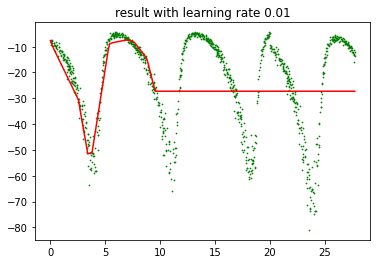

In [65]:
df = pd.read_csv(url)
predictions = []
for i in df['t']:
  predictions.append(model(torch.tensor([i])).detach().numpy()) 
df = df.replace('x', np.nan)
plt.plot(df['t'], predictions, c='red')
plt.scatter(df['t'], pd.to_numeric(df['x']), s=0.5, c='green')
plt.title('result with learning rate ' + str(learning_rate))
plt.show()